In [1]:
import CaboCha


fname_parsed = 'ai.ja/ai.ja.txt.parsed'


In [2]:
class Morph:
    def __init__(self, dct):
        self.surface = dct['surface']
        self.base = dct['base']
        self.pos = dct['pos']
        self.pos1 = dct['pos1']
        
    def __str__(self):
        return "surface:'{}',  base: '{}', pos: '{}',  pos1: '{}'"\
            .format(self.surface, self.base, self.pos, self.pos1)
    

class Chunk:
    def __init__(self, morphs, dst):
        self.morphs = morphs     # 形態素（Morphオブジェクト）のリスト
        self.dst = dst                   # 係り先文節インデックス番号
        self.srcs = []                    # 係り元文節インデックス番号のリスト
        
    def __str__(self):
        return "morphs:'{}',  dst: '{}', srcs: '{}'"\
            .format(self.morphs, self.dst, self.srcs)
    

In [3]:
def dependency_analysis(paragraph) -> list:
    '''ependency_analysis(係り受け解析)の説明
    paragraphはcabocha(CaboCha.FORMAT_LATTICE)で解析したあとのパラグラフとする
    例 出力例(道具を用いて『知能』を研究する)
    形態素のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）
    9.　　 ['道具', 'を'] 10 [5, 6, 8]
    10. ['用い', 'て'] 12 [9]
    11. ['『', '知能', '』', 'を'] 12 []
    12. ['研究', 'する'] 13 [10, 11]
    '''
    morphs =[]
    chunks = []
    lines = paragraph.split('\n')
    for line in lines:
        if line == '':
             chunks.append(Chunk(morphs, dst))
        elif line[0]=='*':
            if len(morphs) > 0:
                chunks.append(Chunk(morphs, dst))
                morphs =[]
            dst = int(line.split(' ')[2].rstrip('D'))
        else:
            cols = line.split('\t')
            cols = [cols[0]] + cols[1].split(',')
            dct = {
                'surface': cols[0],
                'base': cols[7],
                'pos': cols[1],
                'pos1': cols[2]
            }
            morphs.append(Morph(dct))
            
    for  i, chunk in enumerate(chunks):
        if chunk.dst != -1:
            chunks[chunk.dst].srcs.append(i)
            
    return chunks


# in_fileはテキストファイルをcabocha(CaboCha.FORMAT_LATTICE)で解析した後のテキストファイル
with open(fname_parsed) as in_file:
    paragraphs = in_file.read().split('EOS\n')
    
paragraphs = list(filter(lambda x: x!='', paragraphs))

# パラグラフごとに係り受け解析をし, リストに格納
paragraphs = [dependency_analysis(paragraph) for paragraph in paragraphs]

### Graphvizをインストール
`$ brew install graphviz`

### graphviz（python上で使えるようにする）をインストール
`$ pip install graphviz`


In [4]:
from graphviz import Digraph
from IPython.display import Image

In [5]:
G = Digraph(format='png')
G.attr('node', fontname="MS Gothic")

#　第2パラグラフで表示
paragraph = paragraphs[1]
for chunk in paragraph:
    if chunk.dst != -1:
        modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
        modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in paragraph[chunk.dst].morphs])
        G.edge(modifier, modifiee)
G.render('img/q44')

'img/q44.png'

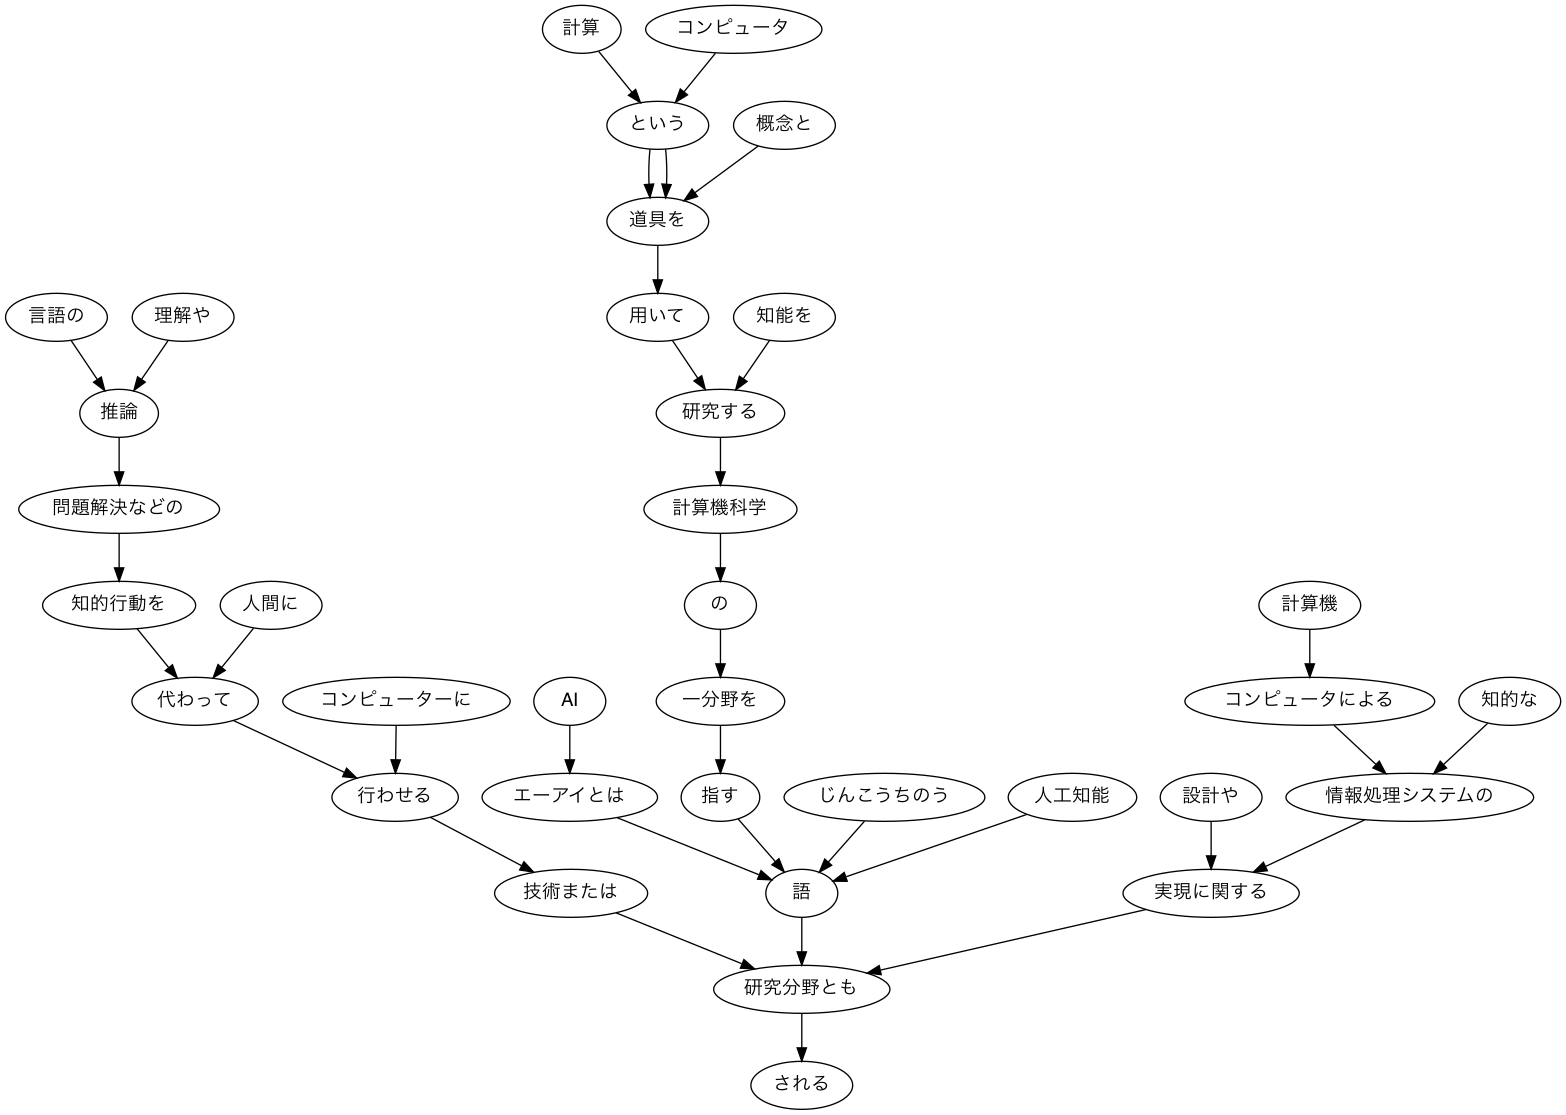

In [6]:
Image('img/q44.png')